In [1]:
import pandas as pd
import numpy as np

In [22]:
dados = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', iterator = True, chunksize=10000, encoding='latin-1')

In [31]:
dados_brutos = pd.concat(dados, ignore_index = True)

In [33]:
dados_brutos.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190002540656,2019,2613800,São Vicente Férrer,26,PE,15,F,1,2,...,A,A,A,B,B,B,B,A,A,A
1,190002540657,2019,2610707,Paulista,26,PE,17,F,1,1,...,A,A,A,C,A,A,D,B,B,B
2,190002540658,2019,2609600,Olinda,26,PE,18,F,1,2,...,B,A,A,B,A,A,E,A,A,B
3,190002540659,2019,2604106,Caruaru,26,PE,19,F,1,3,...,A,A,A,B,A,A,C,A,A,B
4,190002540660,2019,2611101,Petrolina,26,PE,19,F,1,5,...,A,A,A,C,A,A,E,A,A,B


In [35]:
medias = dados_brutos.groupby([dados_brutos['Q006']])['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'].mean().dropna()

In [45]:
medias

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
Q006,,,,,
A,439.452287,464.080137,482.366140,468.090316,483.544454
B,443.681879,470.117737,489.479251,474.086284,503.031312
C,460.210570,489.551173,507.543948,495.066265,532.406066
D,476.102963,506.494623,521.428487,519.889351,557.030858
E,481.956253,513.122156,526.906772,528.511378,571.843226
F,495.427068,525.802366,536.525723,550.444645,594.784496
G,501.472466,532.378106,541.481817,559.593170,610.302205
H,515.477179,544.827035,550.352000,580.412074,633.999820
I,522.227646,551.152810,554.811584,591.519123,648.924664


In [52]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']

In [54]:
labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q']

In [40]:
import matplotlib.pyplot as plt

In [46]:
lista_cn = list(medias['NU_NOTA_CN'])
lista_ch = list(medias['NU_NOTA_CH'])
lista_lc = list(medias['NU_NOTA_LC'])
lista_mt = list(medias['NU_NOTA_MT'])
lista_media_objetivas = [(g + h + i + q) / 4 for g, h, i, q in zip(lista_cn, lista_ch, lista_lc, lista_mt)]

In [47]:
lista_media_objetivas

[463.4972198154727,
 469.34128805301407,
 488.0929888928206,
 505.97885625700343,
 512.6241398505199,
 527.0499505574095,
 533.7313900306524,
 547.76707195995,
 554.9277908388717,
 563.3946247821438,
 567.9961670958983,
 574.1707609405726,
 577.0138035818367,
 583.8191603672223,
 590.9455838345565,
 598.1120497010912,
 604.6920149266789]

In [48]:
lista_media_redacao = list(medias['NU_NOTA_REDACAO'])

In [49]:
lista_media_redacao

[483.5444538056309,
 503.03131216672153,
 532.4060660471515,
 557.0308579280679,
 571.8432262430829,
 594.7844957049318,
 610.3022053127991,
 633.9998195730442,
 648.9246643325371,
 666.203958529689,
 673.6724526718758,
 684.2673173376711,
 687.4488113233475,
 697.297960952358,
 709.4913741820345,
 720.2945345179244,
 728.3934200418532]

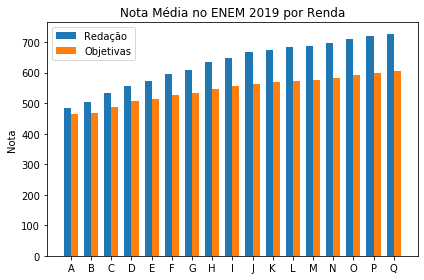

In [55]:
x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lista_media_redacao, width, label='Redação')
rects2 = ax.bar(x + width/2, lista_media_objetivas, width, label='Objetivas')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nota')
ax.set_title('Nota Média no ENEM 2019 por Renda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




fig.tight_layout()

plt.show()

In [127]:
temp = 0
lista_media_agregada = []

In [128]:
for i in range(len(lista_media_redacao)):
    if (i+1)%4 == 0:
        temp += lista_media_redacao[i]
        lista_media_agregada.append(temp/4)
        temp=0
    else:
        temp += lista_media_redacao[i]

In [129]:
lista_media_agregada

[519.0031724868929, 602.7324367084645, 668.2670982179433, 703.6331702439161]

In [130]:
temp2=0
lista_media_agregada_obj = []
for i in range(len(lista_media_objetivas)):
    if (i+1)%4 == 0:
        print(temp2)
        temp2 += lista_media_objetivas[i]
        lista_media_agregada_obj.append(temp2/4)
        temp2=0
    else:
        temp2 += lista_media_objetivas[i]

1420.9314967613072
1573.4054804385817
1686.3185827169136
1751.7785477836155


In [134]:
lista_media_agregada_obj.append(temp2)

In [132]:
temp2

604.6920149266789

In [135]:
lista_media_agregada.append(temp)

In [136]:
lista_media_agregada_obj

[481.72758825457765,
 530.2931380996329,
 565.1223359143715,
 587.4726493711767,
 604.6920149266789]

In [137]:
lista_media_agregada

[519.0031724868929,
 602.7324367084645,
 668.2670982179433,
 703.6331702439161,
 728.3934200418532]

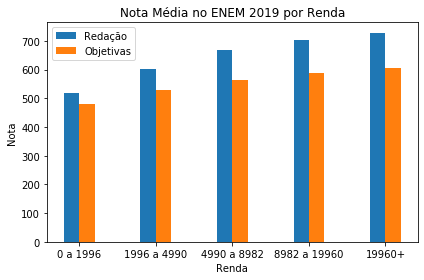

In [143]:
labels = ['0 a 1996', '1996 a 4990', '4990 a 8982', '8982 a 19960', '19960+']
x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lista_media_agregada, width, label='Redação')
rects2 = ax.bar(x + width/2, lista_media_agregada_obj, width, label='Objetivas')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nota')
ax.set_xlabel('Renda')
ax.set_title('Nota Média no ENEM 2019 por Renda')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




fig.tight_layout()

plt.savefig('graficoenem.png')